<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/Airline_Passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [48]:
# load the dataset
url = 'https://raw.githubusercontent.com/ibribr/ML/master/international-airline-passengers.csv'

df = pd.read_csv(url, usecols=[1])
df = df.dropna()
dataset = df.values
dataset = dataset.astype("float32")

print(len(dataset))

# split into train and test sets
train_dataset = dataset[:int(len(dataset)*0.7), :]
test_dataset = dataset[int(len(dataset)*0.7):, :]

print(len(train_dataset), len(test_dataset))

144
100 44


In [57]:
def create_dataset(dataset, lookback=1):
    dataX = []
    dataY = []
    for i in range(len(dataset) - lookback - 1):
        a = dataset[i: (i+lookback), 0]
        dataX.append(a)
        dataY.append(dataset[i+lookback,0])
    return np.array(dataX), np.array(dataY)

lookback = 3
xtrain, ytrain = create_dataset(train_dataset, lookback)
xtest, ytest = create_dataset(test_dataset, lookback)

print(xtrain.shape)
print(ytrain.shape)

print(xtrain[0:3,:])

(96, 3)
(96,)
[[0.01544401 0.02702703 0.05405405]
 [0.02702703 0.05405405 0.04826255]
 [0.05405405 0.04826255 0.03281853]]


(96, 3) (96,)
Epoch 1/200
48/48 - 0s - loss: 0.0782
Epoch 2/200
48/48 - 0s - loss: 0.0607
Epoch 3/200
48/48 - 0s - loss: 0.0488
Epoch 4/200
48/48 - 0s - loss: 0.0413
Epoch 5/200
48/48 - 0s - loss: 0.0369
Epoch 6/200
48/48 - 0s - loss: 0.0337
Epoch 7/200
48/48 - 0s - loss: 0.0314
Epoch 8/200
48/48 - 0s - loss: 0.0296
Epoch 9/200
48/48 - 0s - loss: 0.0279
Epoch 10/200
48/48 - 0s - loss: 0.0261
Epoch 11/200
48/48 - 0s - loss: 0.0245
Epoch 12/200
48/48 - 0s - loss: 0.0230
Epoch 13/200
48/48 - 0s - loss: 0.0215
Epoch 14/200
48/48 - 0s - loss: 0.0201
Epoch 15/200
48/48 - 0s - loss: 0.0187
Epoch 16/200
48/48 - 0s - loss: 0.0173
Epoch 17/200
48/48 - 0s - loss: 0.0160
Epoch 18/200
48/48 - 0s - loss: 0.0148
Epoch 19/200
48/48 - 0s - loss: 0.0137
Epoch 20/200
48/48 - 0s - loss: 0.0127
Epoch 21/200
48/48 - 0s - loss: 0.0118
Epoch 22/200
48/48 - 0s - loss: 0.0109
Epoch 23/200
48/48 - 0s - loss: 0.0101
Epoch 24/200
48/48 - 0s - loss: 0.0095
Epoch 25/200
48/48 - 0s - loss: 0.0089
Epoch 26/200
48/48 -

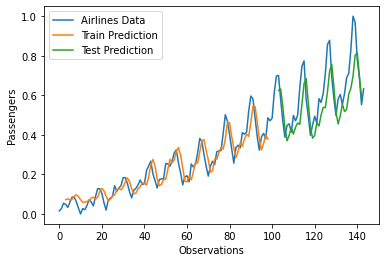

In [58]:
# MLP
print(xtrain.shape, ytrain.shape)
# fix random seed for reproducibility
numpy.random.seed(7)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim = lookback, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(xtrain, ytrain, epochs=200, batch_size=2, verbose=2)

# Estimate model performance
trainScore = model.evaluate(xtrain, ytrain, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(xtest, ytest, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# generate predictions for training
trainPredict = model.predict(xtrain)
testPredict = model.predict(xtest)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset, label="Airlines Data")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.xlabel("Observations")
plt.ylabel("Passengers")
plt.legend()
plt.show()

(96, 3)
[[[0.01544401 0.02702703 0.05405405]]

 [[0.02702703 0.05405405 0.04826255]]

 [[0.05405405 0.04826255 0.03281853]]]
Epoch 1/100
96/96 - 0s - loss: 0.0510
Epoch 2/100
96/96 - 0s - loss: 0.0185
Epoch 3/100
96/96 - 0s - loss: 0.0125
Epoch 4/100
96/96 - 0s - loss: 0.0108
Epoch 5/100
96/96 - 0s - loss: 0.0095
Epoch 6/100
96/96 - 0s - loss: 0.0083
Epoch 7/100
96/96 - 0s - loss: 0.0075
Epoch 8/100
96/96 - 0s - loss: 0.0067
Epoch 9/100
96/96 - 0s - loss: 0.0062
Epoch 10/100
96/96 - 0s - loss: 0.0057
Epoch 11/100
96/96 - 0s - loss: 0.0053
Epoch 12/100
96/96 - 0s - loss: 0.0050
Epoch 13/100
96/96 - 0s - loss: 0.0049
Epoch 14/100
96/96 - 0s - loss: 0.0047
Epoch 15/100
96/96 - 0s - loss: 0.0046
Epoch 16/100
96/96 - 0s - loss: 0.0045
Epoch 17/100
96/96 - 0s - loss: 0.0044
Epoch 18/100
96/96 - 0s - loss: 0.0046
Epoch 19/100
96/96 - 0s - loss: 0.0043
Epoch 20/100
96/96 - 0s - loss: 0.0042
Epoch 21/100
96/96 - 0s - loss: 0.0041
Epoch 22/100
96/96 - 0s - loss: 0.0041
Epoch 23/100
96/96 - 0s - 

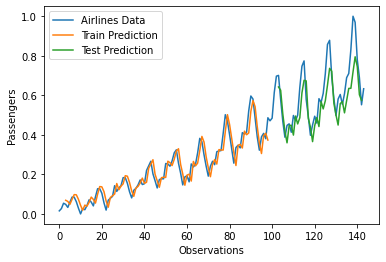

In [59]:
# fix random seed for reproducibility
np.random.seed(7)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_dataset = dataset[:int(len(dataset)*0.7), :]
test_dataset = dataset[int(len(dataset)*0.7):, :]

lookback = 3
xtrain, ytrain = create_dataset(train_dataset, lookback)
xtest, ytest = create_dataset(test_dataset, lookback)

print(xtrain.shape)

# Reshape input to be [samples, time steps, features]
xtrain = np.reshape(xtrain, (xtrain.shape[0], 1, xtrain.shape[1]))
xtest = np.reshape(xtest, (xtest.shape[0], 1, xtest.shape[1]))

print(xtrain[0:3,:,:])

#LSTM 
model = Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1, activation='tanh'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(xtrain, ytrain, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(xtrain)
testPredict = model.predict(xtest)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
ytrain = scaler.inverse_transform([ytrain])
testPredict = scaler.inverse_transform(testPredict)
ytest = scaler.inverse_transform([ytest])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(ytrain[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(ytest[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label="Airlines Data")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.xlabel("Observations")
plt.ylabel("Passengers")
plt.legend()
plt.show()